In [13]:
from __future__ import print_function
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import matplotlib.pyplot as plt
import os

In [3]:
batch_size = 32
num_classes = 10
epochs = 20
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_cifar10_trained_model.h5'

In [4]:
# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


# Question 1

a) Compare the accuracy of the convolutional neural network in the file cifar10 cnn cs480.py on the
cifar10 dataset to the accuracy of simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers of 512
rectified linear units each. Run the code in the file cifar10 cnn cs480.py without changing the parameters to train a convolutional neural networks. Then, modify the code in cifar10 cnn cs480.py
to obtain simple dense neural networks with 0, 1, 2, 3 and 4 hidden layers of 512 rectified linear units
(with a dropout rate of 0.5). Produce two graphs that contain 6 curves (one for the convolutional neural
net and one for each dense neural net of 0-4 hidden layers). The y-axis is the accuracy and the x-axis is
the number of epochs (# of passes through the training set). Since neural networks take a while to train,
cross-validation is not practical. Instead, produce one graph where all the curves correspond to the training accuracy and a second graph where all the curves correspond to the test accuracy. Train the neural
networks for 20 epochs. Although 20 epochs is not sufficient to reach convergence, it is sufficient to see
the trend. Submit your code and explain the results (i.e., why some models perform better or worse than
other models).

Create CNN model architecture

In [8]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

Simple Dense Neural Network

In [ ]:
def sdnn(num_hidden_layers):
  model = Sequential()
  model.add(Flatten()) # input layer -> convert to 1D array
  for i in range(num_hidden_layers):
    model.add(Dense(512)) # first hidden layer 300 neurons
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
  model.add(Dense(num_classes))
  model.add(Activation('softmax'))
  return model

In [9]:
# initiate RMSprop optimizer
opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

In [10]:
# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [11]:
reference = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.7974 - accuracy: 0.3467 - val_loss: 1.5172 - val_accuracy: 0.4522
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4439 - accuracy: 0.4813 - val_loss: 1.3623 - val_accuracy: 0.5050
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2776 - accuracy: 0.5439 - val_loss: 1.1604 - val_accuracy: 0.5927
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1681 - accuracy: 0.5880 - val_loss: 1.0876 - val_accuracy: 0.6148
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0930 - accuracy: 0.6128 - val_loss: 1.0030 - val_accuracy: 0.6482
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0205 - accuracy: 0.6403 - val_loss: 0.9516 - val_accuracy: 0.6605
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9685 - accuracy: 0.6620 - val_loss: 0.9195 - val_accuracy

In [ ]:
SDNNhistory = []
for i in range(5):
  model = sdnn(i)
  # Let's train the model using RMSprop
  model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  history = model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=epochs,
                  validation_data=(x_test, y_test),
                  shuffle=True)
  SDNNhistory.append(history.history)

Epoch 1/20
1563/1563 [==============================] - 5s 3ms/step - loss: 1.9777 - accuracy: 0.2956 - val_loss: 1.8821 - val_accuracy: 0.3401
Epoch 2/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8500 - accuracy: 0.3537 - val_loss: 1.8368 - val_accuracy: 0.3600
Epoch 3/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8157 - accuracy: 0.3701 - val_loss: 1.8237 - val_accuracy: 0.3609
Epoch 4/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7962 - accuracy: 0.3774 - val_loss: 1.7849 - val_accuracy: 0.3840
Epoch 5/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7814 - accuracy: 0.3830 - val_loss: 1.8006 - val_accuracy: 0.3686
Epoch 6/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7710 - accuracy: 0.3881 - val_loss: 1.7858 - val_accuracy: 0.3792
Epoch 7/20
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7621 - accuracy: 0.3923 - val_loss: 1.7569 - val_accuracy:

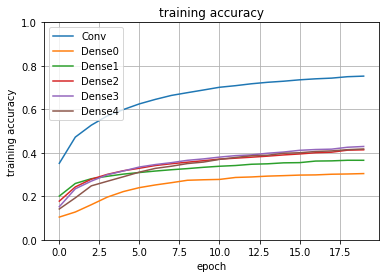

In [ ]:
plt.plot(reference.history['accuracy'])

for i in range(5):
  plt.plot(SDNNhistory[i]['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Conv', 'Dense0', 'Dense1', 'Dense2', 'Dense3', 'Dense4'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

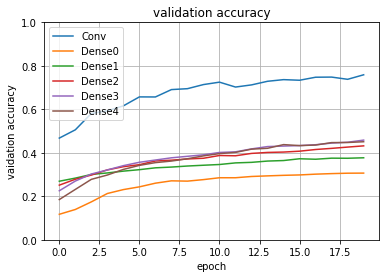

In [ ]:
plt.plot(reference.history['val_accuracy'])

for i in range(5):
  plt.plot(SDNNhistory[i]['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('vaidation accuracy')
plt.xlabel('epoch')
plt.legend(['Conv', 'Dense0', 'Dense1', 'Dense2', 'Dense3', 'Dense4'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The convolutional neural network obtained the best results, followed by the dense neural networks. The CNN is much better because it is sparse with shared weights that induce equivariance. This simplifies the optimization, while requiring less data to generalize well. Overfitting is not a problem since similar results are observed for training accuracy and testing accuracy. Gradients should not vanish since we are using ReLU and the networks are not very deep.

b) Compare the accuracy achieved by rectified linear units and sigmoid units in the convolutional neural
network in cifar10 cnn cs480.py. Modify the code in cifar10 cnn cs480.py to use sigmoid
units. Produce two graphs (one for training accurqcy and one for test accuracy) that each contain 2 curves
(one for rectified linear units and another one for sigmoid units). The y-axis is the accuracy and the x-axis
1 is the number of epochs. Train the neural networks for 20 epochs. Although 20 epochs is not sufficient to
reach convergence, it is sufficient to see the trend. Explain the results (i.e., why one model performs better
or worse than the other model). No need to submit your code since the modifications are simple

Model with sigmoid activation function

In [5]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('sigmoid'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('sigmoid'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [6]:
opt = keras.optimizers.RMSprop(lr=0.001, decay=1e-6)

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 2.1022 - accuracy: 0.2307 - val_loss: 1.7853 - val_accuracy: 0.3546
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.7444 - accuracy: 0.3731 - val_loss: 1.7887 - val_accuracy: 0.3744
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6001 - accuracy: 0.4306 - val_loss: 1.4799 - val_accuracy: 0.4757
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.5287 - accuracy: 0.4601 - val_loss: 1.3571 - val_accuracy: 0.5167
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4794 - accuracy: 0.4780 - val_loss: 1.4066 - val_accuracy: 0.4977
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4467 - accuracy: 0.4919 - val_loss: 1.3313 - val_accuracy: 0.5391
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.4255 - accuracy: 0.5018 - val_loss: 1.3580 - val_accuracy

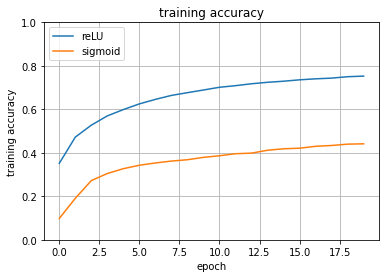

In [ ]:
plt.plot(reference.history['accuracy'])
plt.plot(history.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['reLU', 'sigmoid'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

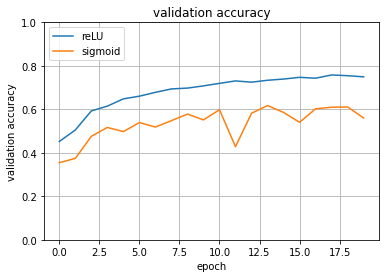

In [14]:
plt.plot(reference.history['val_accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['reLU', 'sigmoid'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The ReLU gives much better results than sigmoid units. Sigmoid units are more subject to the gradient vanishing problem. 

c) Compare the accuracy achieved with and without drop out as well as with and without data augmentation in
the convolutional neural network in cifar10 cnn cs480.py. Modify the code in cifar10 cnn cs480.py
to turn on and off dropout as well as data augmentation. Produce two graphs (one for training accuracy and
the other one for test accuracy) that each contain 4 curves (with and without dropout as well as with and
without data augmentation). The y-axis is the accuracy and the x-axis is the number of epochs. Produce
curves for as many epochs as you can up to 100 epochs. Explain the results (i.e., why did some models
perform better or worse than other models and are the results consistent with the theory). No marks will
be deducted for doing less than 100 epochs, however make sure to explain what you expect to see in the
curves as the number of epochs reaches 100. No need to submit your code since the modifications are
simple.

No Dropout

In [15]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

no_dropout = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.6323 - accuracy: 0.4149 - val_loss: 1.3937 - val_accuracy: 0.5046
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.2841 - accuracy: 0.5458 - val_loss: 1.1885 - val_accuracy: 0.5807
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.1155 - accuracy: 0.6088 - val_loss: 1.1906 - val_accuracy: 0.5830
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.9926 - accuracy: 0.6525 - val_loss: 1.0586 - val_accuracy: 0.6325
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8977 - accuracy: 0.6875 - val_loss: 0.9452 - val_accuracy: 0.6682
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8204 - accuracy: 0.7152 - val_loss: 0.9108 - val_accuracy: 0.6859
Epoch 7/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7518 - accuracy: 0.7395 - val_loss: 0.8776 - val_accuracy:

No Dropout Data Augmentation

In [16]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])
  
  
datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
no_drop_aug = model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    steps_per_epoch=1563,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.7062 - accuracy: 0.3862 - val_loss: 1.4794 - val_accuracy: 0.4656
Epoch 2/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.4169 - accuracy: 0.4928 - val_loss: 1.3166 - val_accuracy: 0.5299
Epoch 3/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.2788 - accuracy: 0.5437 - val_loss: 1.1501 - val_accuracy: 0.5907
Epoch 4/20
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1870 - accuracy: 0.5784 - val_loss: 1.0739 - val_accuracy: 0.6246
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.1093 - accuracy: 0.6100 - val_loss: 1.0559 - val_accuracy: 0.6277
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.0447 - accuracy: 0.6321 - val_loss: 0.9881 - val_accuracy: 0.6581
Epoch 7/20
1563/1563 [==========================

Dropout & Data Aug

In [17]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

# Let's train the model using RMSprop
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    zca_epsilon=1e-06,  # epsilon for ZCA whitening
    rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
    # randomly shift images horizontally (fraction of total width)
    width_shift_range=0.1,
    # randomly shift images vertically (fraction of total height)
    height_shift_range=0.1,
    shear_range=0.,  # set range for random shear
    zoom_range=0.,  # set range for random zoom
    channel_shift_range=0.,  # set range for random channel shifts
    # set mode for filling points outside the input boundaries
    fill_mode='nearest',
    cval=0.,  # value used for fill_mode = "constant"
    horizontal_flip=True,  # randomly flip images
    vertical_flip=False,  # randomly flip images
    # set rescaling factor (applied before any other transformation)
    rescale=None,
    # set function that will be applied on each input
    preprocessing_function=None,
    # image data format, either "channels_first" or "channels_last"
    data_format=None,
    # fraction of images reserved for validation (strictly between 0 and 1)
    validation_split=0.0)

# Compute quantities required for feature-wise normalization
# (std, mean, and principal components if ZCA whitening is applied).
datagen.fit(x_train)

# Fit the model on the batches generated by datagen.flow().
drop_aug = model.fit_generator(datagen.flow(x_train, y_train,
                                  batch_size=batch_size),
                    steps_per_epoch=1563,
                    epochs=epochs,
                    validation_data=(x_test, y_test),
                    workers=4)

Epoch 1/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.8549 - accuracy: 0.3201 - val_loss: 1.5566 - val_accuracy: 0.4405
Epoch 2/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.5681 - accuracy: 0.4307 - val_loss: 1.3809 - val_accuracy: 0.5032
Epoch 3/20
1563/1563 [==============================] - 33s 21ms/step - loss: 1.4368 - accuracy: 0.4820 - val_loss: 1.3386 - val_accuracy: 0.5161
Epoch 4/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.3450 - accuracy: 0.5166 - val_loss: 1.1717 - val_accuracy: 0.5856
Epoch 5/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2719 - accuracy: 0.5461 - val_loss: 1.1589 - val_accuracy: 0.5934
Epoch 6/20
1563/1563 [==============================] - 32s 21ms/step - loss: 1.2055 - accuracy: 0.5712 - val_loss: 1.0740 - val_accuracy: 0.6183
Epoch 7/20
1563/1563 [==============================] - 31s 20ms/step - loss: 1.1573 - accuracy: 0.5882 - val_loss: 1.0845 -

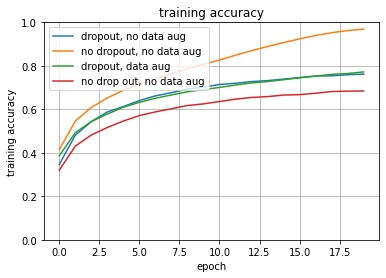

In [19]:
plt.plot(reference.history['accuracy'])
plt.plot(no_dropout.history['accuracy'])
plt.plot(no_drop_aug.history['accuracy'])
plt.plot(drop_aug.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['dropout, no data aug', 'no dropout, no data aug', 'dropout, data aug', 'no drop out, no data aug'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

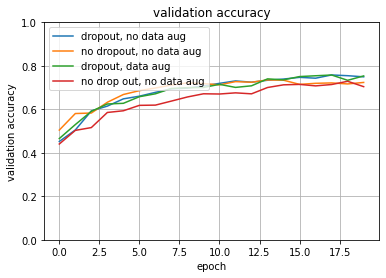

In [20]:
plt.plot(reference.history['val_accuracy'])
plt.plot(no_dropout.history['val_accuracy'])
plt.plot(no_drop_aug.history['val_accuracy'])
plt.plot(drop_aug.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['dropout, no data aug', 'no dropout, no data aug', 'dropout, data aug', 'no drop out, no data aug'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The regime without dropout and without data augmentation learns the fastest, However, it also overfits the most as we increase the number of iterations. Data augmentation helps tremendously to imrpvoe generalization. Grouput helps to improve generalization when there is no data augmentation, but worsens the results when there is data augmentation. 

d) Compare the accuracy achieved when training the convolutional neural network in cifar10 cnn cs480.py
with three different optimizers: RMSprop, Adagrad and Adam. Modify the code in cifar10 cnn cs480.py
to use the Adagrad and Adam optimizers (with default parameters). Produce two graphs (one for training accuracy and the other one for test accuracy) that each contain 3 curves (for RMSprop, Adagrad and
Adam). The y-axis is the accuracy and the x-axis is the number of epochs. Produce curves for as many
epochs as you can up to 100 epochs. Explain the results (i.e., why did some optimizers perform better
or worse than other optimizers). No marks will be deducted for doing less than 100 epochs. No need to
submit your code since the modifications are simple

CNN Model Architecture

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [22]:
opt = keras.optimizers.Adam(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

adam = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7262 - accuracy: 0.3687 - val_loss: 1.4074 - val_accuracy: 0.4934
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3924 - accuracy: 0.4996 - val_loss: 1.2239 - val_accuracy: 0.5681
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2388 - accuracy: 0.5593 - val_loss: 1.0980 - val_accuracy: 0.6130
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1323 - accuracy: 0.6006 - val_loss: 1.0461 - val_accuracy: 0.6262
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0533 - accuracy: 0.6272 - val_loss: 0.9657 - val_accuracy: 0.6646
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9842 - accuracy: 0.6529 - val_loss: 0.9512 - val_accuracy: 0.6677
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9356 - accuracy: 0.6705 - val_loss: 0.8786 - val_accuracy:

In [23]:
opt = keras.optimizers.Adagrad(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

adagrad = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4682 - accuracy: 0.8371 - val_loss: 0.6553 - val_accuracy: 0.7776
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4615 - accuracy: 0.8398 - val_loss: 0.6557 - val_accuracy: 0.7774
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4609 - accuracy: 0.8398 - val_loss: 0.6555 - val_accuracy: 0.7780
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4575 - accuracy: 0.8389 - val_loss: 0.6562 - val_accuracy: 0.7776
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4524 - accuracy: 0.8411 - val_loss: 0.6560 - val_accuracy: 0.7784
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4526 - accuracy: 0.8399 - val_loss: 0.6560 - val_accuracy: 0.7781
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4489 - accuracy: 0.8433 - val_loss: 0.6560 - val_accuracy:

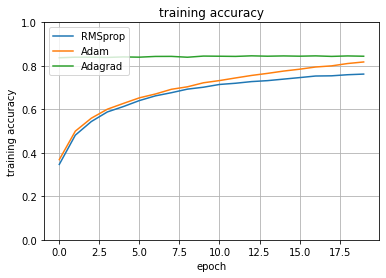

In [24]:
plt.plot(reference.history['accuracy'])
plt.plot(adam.history['accuracy'])
plt.plot(adagrad.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adam', 'Adagrad'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

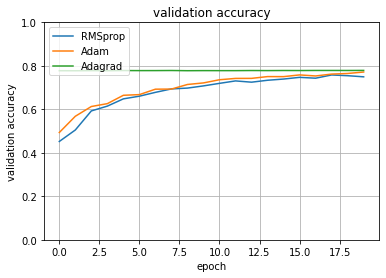

In [25]:
plt.plot(reference.history['val_accuracy'])
plt.plot(adam.history['val_accuracy'])
plt.plot(adagrad.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['RMSprop', 'Adam', 'Adagrad'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The adagrad optimizer performed the best followed by Adam and RMSprop. Adagrad quickly decays the learning rate by dividing the square root of the sume of square of partial derivatives. This was benegicial in this problme and as a result of quickly decaying learning rates, the accuracy curve was fairly smooth. 

e) Compare the accuracy of the convolutional neural network in the file cifar10 cnn cs480.py with
a modified version that replaces each stack of (CONV2D, Activation, CONV2D, Activation) layers with
3x3 filters by a smaller stack of (CONV2D, Activation) layers with 5x5 filters. Produce two graphs (one
for training accuracy and the other one for test accuracy) that each contain 2 curves (for 3x3 filters and
5x5 filters). The y-axis is the accuracy and the x-axis is the number of epochs. Produce curves for as
many epochs as you can up to 100 epochs. Submit your code and explain the results (i.e., why did one
architecture perform better or worse than the other architecture). No marks will be deducted for doing less
than 100 epochs.

In [27]:
model = Sequential()
model.add(Conv2D(32, (5, 5), padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (5, 5), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

fivebyfive = model.fit(x_train, y_train,
                batch_size=batch_size,
                epochs=epochs,
                validation_data=(x_test, y_test),
                shuffle=True)

Epoch 1/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7780 - accuracy: 0.3555 - val_loss: 1.5897 - val_accuracy: 0.4413
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4448 - accuracy: 0.4812 - val_loss: 1.3021 - val_accuracy: 0.5428
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3159 - accuracy: 0.5294 - val_loss: 1.2032 - val_accuracy: 0.5779
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2198 - accuracy: 0.5665 - val_loss: 1.1570 - val_accuracy: 0.6006
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1474 - accuracy: 0.5949 - val_loss: 1.0744 - val_accuracy: 0.6303
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0864 - accuracy: 0.6176 - val_loss: 1.0487 - val_accuracy: 0.6297
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0424 - accuracy: 0.6373 - val_loss: 0.9857 - val_accuracy:

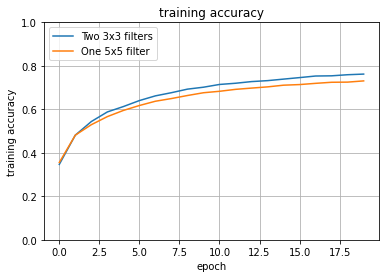

In [28]:
plt.plot(reference.history['accuracy'])
plt.plot(fivebyfive.history['accuracy'])

plt.title('training accuracy')
plt.ylabel('training accuracy')
plt.xlabel('epoch')
plt.legend(['Two 3x3 filters', 'One 5x5 filter'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

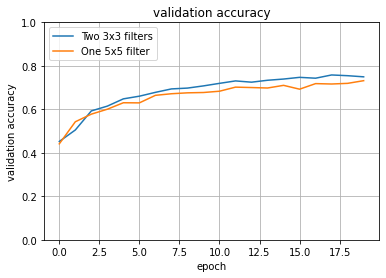

In [29]:
plt.plot(reference.history['val_accuracy'])
plt.plot(fivebyfive.history['val_accuracy'])

plt.title('validation accuracy')
plt.ylabel('validation accuracy')
plt.xlabel('epoch')
plt.legend(['Two 3x3 filters', 'One 5x5 filter'], loc='upper left')
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

The network with 2 stacked 3x3 filters performed better than a single 5x5 filter. This is consistent with theory since stacking paris of 3x3 filters, we obtain deeper networks with fewer parameters while ensuring that a 4x4 receptive field is still used in the computation of each feature map.

# Question 2

In object recognition, translating an image by a few pixels in some direction should not affect the
category recognized. Suppose that we consider images with an object in the foreground on top of a uniform
background. Suppose also that the objects of interest are always at least 10 pixels away from the borders of the
image. Are the following neural networks invariant to translations of at most 10 pixels in some direction? Here
the translation is applied only to the foreground object while keeping the background fixed. If your answer is
yes, show that the neural network will necessarily produce the same output for two images where the foreground
object is translated by at most 10 pixels. If your answer is no, provide a counter example by describing a situation
where the output of the neural network is different for two images where the foreground object is translated by
at most 10 pixels.

a) Neural network with one hidden layer consisting of convolutions (5x5 patches with a stride of 1
in each direction) and a softmax output layer.

No, it is not translation invariant. Consider an image $I$ and its translation $I'$. The hidden units activated by the image $i$ are different than those activated by $I'$. Since the weights in the softmax layer can be arbitrary, the ouput of the network depends on which hidden units are activated and therefore $I$ and $I'$ generally yield different outputs.


b) Neural network with two hidden layers consisting of convolutions (5x5 patches with a stride of 1
in each direction) followed by max pooling (4x4 patches with a stride of 4 in each direction) and a softmax
output layer.

No, max pooling only leads to local invariance and not global invariance. Consider an image $I$ and its translation $I'$. Max pooling over patches of 4x4 only ensure that local translation within each patch do not affect the output. Since the image is shifted globally then different units will be activated by $I$ and $I'$ in both the convolution and max ooling layers.